In [6]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('dataset.csv')
dataset

,edge_id,length,minute,speed,is_holiday,weather
0,246,1726,505,22.140185,1,1
1,316,1750,740,54.303369,0,0
2,387,1612,745,56.303877,0,1
3,303,1927,1335,23.641228,0,2
4,250,1901,915,41.503161,0,1
...,...,...,...,...,...,...
784219,221,1851,1015,27.068770,0,1
784220,227,1768,175,47.168667,0,1
784221,110,1699,1220,28.605635,0,1
784222,289,1750,1410,21.889339,0,1


In [3]:
testcases = pd.read_csv('test_cases.csv')
testcases

,src,dest,route_start_t,is_holiday,weather,eta,route
0,27,90,521,0,0,NaN,NaN
1,60,114,835,1,2,NaN,NaN
2,18,112,668,0,0,NaN,NaN
3,96,18,1114,0,2,NaN,NaN
4,66,135,1116,0,0,NaN,NaN
...,...,...,...,...,...,...,...
9995,82,194,605,0,0,NaN,NaN
9996,75,159,497,0,1,NaN,NaN
9997,14,176,712,0,0,NaN,NaN
9998,14,77,1136,0,0,NaN,NaN


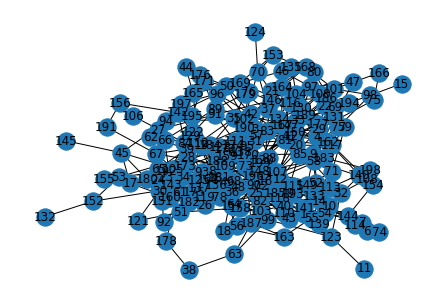

In [4]:
my_graph = nx.read_gpickle('network.gpickle')
nx.draw(my_graph, with_labels=True)

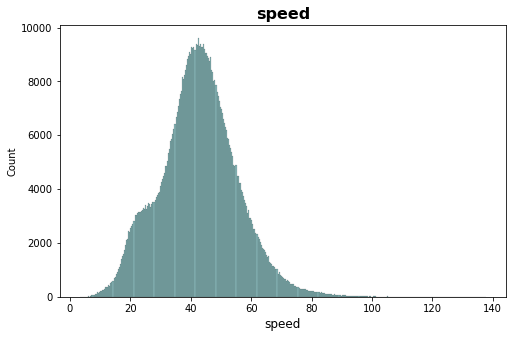

In [7]:
def histplot(name):
    plt.figure(figsize=(8,5))
    sns.histplot(dataset[name], color='cadetblue')
    plt.title(name, fontsize=16, fontweight='bold')
    plt.xlabel(name, fontsize=12)
    plt.show()
    
barplot('speed')

In [8]:
mean = dataset.speed.mean()
std = dataset.speed.std()
z = dataset.speed.apply(lambda x: abs(x-mean)/std)
z.describe() 

count    7.685400e+05
mean     7.777547e-01
std      6.285673e-01
min      4.227640e-09
25%      2.834032e-01
50%      6.205994e-01
75%      1.143641e+00
max      7.397472e+00
Name: speed, dtype: float64

In [9]:
dataset.drop(z[z>3].index, inplace=True)
dataset

,edge_id,length,minute,speed,is_holiday,weather
0,246,1726,505,22.140185,1,1
1,316,1750,740,54.303369,0,0
2,387,1612,745,56.303877,0,1
3,303,1927,1335,23.641228,0,2
4,250,1901,915,41.503161,0,1
...,...,...,...,...,...,...
784219,221,1851,1015,27.068770,0,1
784220,227,1768,175,47.168667,0,1
784221,110,1699,1220,28.605635,0,1
784222,289,1750,1410,21.889339,0,1


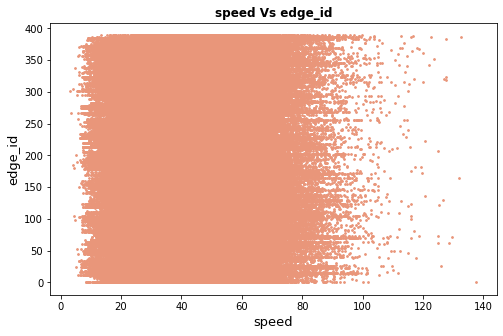

In [7]:
def scatterPlot(name, name2):
    plt.figure(figsize=(8,5))
    plt.scatter(dataset[name], dataset[name2], s=3, c='darksalmon')
    plt.title(name + ' Vs ' + name2, fontweight='bold')
    plt.xlabel(name, fontsize=13)
    plt.ylabel(name2, fontsize=13)
    plt.show()
    
scatterPlot('speed', 'edge_id')

In [8]:
a = dataset.groupby('edge_id')
a.head()

,edge_id,length,minute,speed,is_holiday,weather
0,246,1726,505,22.140185,1,1
1,316,1750,740,54.303369,0,0
2,387,1612,745,56.303877,0,1
3,303,1927,1335,23.641228,0,2
4,250,1901,915,41.503161,0,1
...,...,...,...,...,...,...
4662,235,1946,915,60.977309,1,0
4683,291,1577,1145,14.165785,0,2
4809,79,1615,120,61.874806,0,0
5190,79,1615,70,NaN,0,1
